In [7]:
!pip install alibi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.8 MB/s eta 0:00:00


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from alibi.explainers import AnchorTabular

# Step 1: Load the CSV dataset
df = pd.read_csv('FDM.csv')
X = df.iloc[:, 0:4]  # Assuming the first 4 columns are your input parameters
y = df.iloc[:, 4]  # Assuming the last column is your output parameter

# Scale your data (optional, but often a good idea)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Random Forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Step 3: Use AnchorTabular to interpret the model
predict_fn = lambda x: rf.predict(x)
explainer = AnchorTabular(predict_fn, df.columns.tolist()[:-1])

# Fit the explainer
explainer.fit(X_train)

# Select the instance for which you want to interpret the prediction
i = 1  # For example, interpret the prediction for the second instance in the test set
explanation = explainer.explain(X_test[i], threshold=0.95)

# Print the anchor
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


Anchor: Infill percentage > 0.25 AND Print speed > 0.25 AND -0.04 < Extrusion temp <= 1.10 AND Layer height > 0.25
Precision: 0.72
Coverage: 0.00


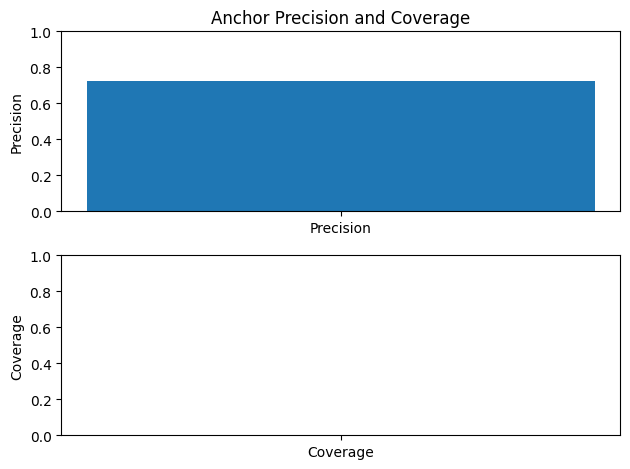

<Figure size 640x480 with 0 Axes>

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(2)

# Plot precision
axs[0].bar('Precision', explanation.precision)
axs[0].set_ylim([0, 1])
axs[0].set_ylabel('Precision')
axs[0].set_title('Anchor Precision and Coverage')

# Plot coverage
axs[1].bar('Coverage', explanation.coverage)
axs[1].set_ylim([0, 1])
axs[1].set_ylabel('Coverage')

# Display the figure
plt.tight_layout()
plt.show()

# Save the figure as an image
plt.savefig('anchor_precision_coverage.png', dpi=300, bbox_inches='tight')
